In [1]:
#Loading The Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("heart.csv")

In [5]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [6]:
df.count()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

In [7]:
df.shape

(1025, 14)

![alt](https://www.researchgate.net/profile/Francesca-Ieva/publication/236012372/figure/fig8/AS:329705489223683@1455619322963/Stylized-shape-of-a-physiological-single-beat-recorded-on-ECG-graph-paper-Main-relevant.png)

In [8]:
# Find missing values
print('Missing values:{}'.format(df.isnull().any().sum()))
# Find duplicated records
print('\nNumber of duplicated records: {}'.format(df.duplicated().sum()))

Missing values:0

Number of duplicated records: 723


In [9]:
# dropping ALL duplicte values 
df.drop_duplicates(inplace = True) 

In [10]:
print('\nNumber of duplicated records: {}'.format(df.duplicated().sum()))


Number of duplicated records: 0


In [11]:
df.shape

(302, 14)

In [ ]:
df.to_csv('Cleanning Heart diseases dataset.csv', encoding='utf-8',sep=',',index=False)

In [ ]:
df=pd.read_csv("Cleanning Heart diseases dataset.csv")

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [13]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


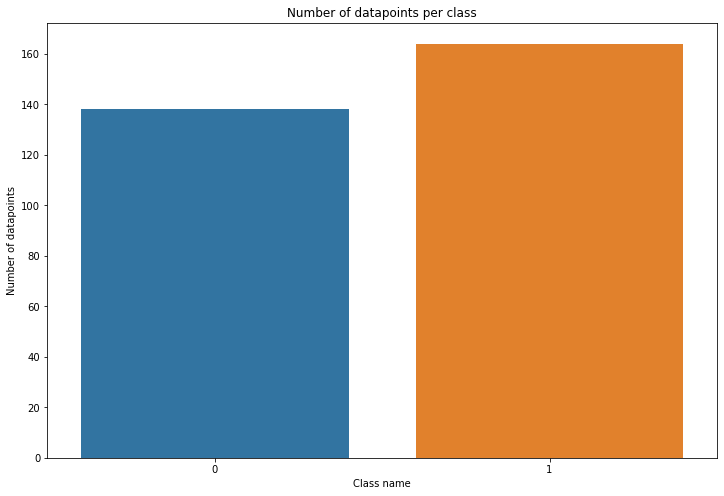

In [14]:
# Plot per class data-points
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 8))
sns.countplot(df["target"])
plt.title("Number of datapoints per class")
plt.ylabel("Number of datapoints")
plt.xlabel("Class name")
plt.show()

1    206
0     96
Name: sex, dtype: int64


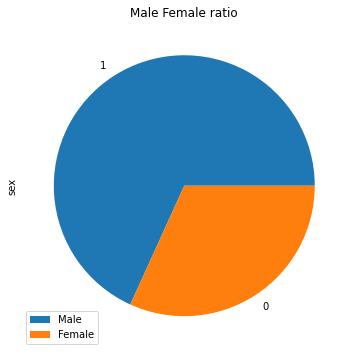

In [15]:
#First look at the number of Males and Females in the data
print(df['sex'].value_counts())
df['sex'].value_counts().plot(kind = 'pie', figsize = (8, 6))
plt.title('Male Female ratio')
plt.legend(['Male', 'Female'])

In [18]:
from sklearn.model_selection import train_test_split
x = df.drop(['target'], axis = 1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 0)

In [21]:
print(x_train.count()/308)
print(x_test.count()/308)

age         0.685065
sex         0.685065
cp          0.685065
trestbps    0.685065
chol        0.685065
fbs         0.685065
restecg     0.685065
thalach     0.685065
exang       0.685065
oldpeak     0.685065
slope       0.685065
ca          0.685065
thal        0.685065
dtype: float64
age         0.295455
sex         0.295455
cp          0.295455
trestbps    0.295455
chol        0.295455
fbs         0.295455
restecg     0.295455
thalach     0.295455
exang       0.295455
oldpeak     0.295455
slope       0.295455
ca          0.295455
thal        0.295455
dtype: float64


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
print('Accuracy of KNN n-5, on the trainning set:{:.3f}'.format(knn.score(x_train,y_train)))
print('Accuracy of KNN n-5, on the testting set:{:.3f}'.format(knn.score(x_test,y_test)))

Accuracy of KNN n-5, on the trainning set:0.777
Accuracy of KNN n-5, on the testting set:0.637


In [25]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_test=sc_X.fit_transform(x_test)

In [26]:
x_train

array([[-1.19333929,  0.67466467, -0.87293425, ...,  1.00118554,
        -0.68608335, -0.55057475],
       [ 0.6266046 , -1.48221783,  2.14655962, ...,  1.00118554,
        -0.68608335, -0.55057475],
       [ 1.26893774,  0.67466467, -0.87293425, ...,  1.00118554,
         0.36292815, -0.55057475],
       ...,
       [-2.156839  ,  0.67466467,  2.14655962, ...,  1.00118554,
        -0.68608335, -0.55057475],
       [ 0.41249356, -1.48221783,  2.14655962, ...,  1.00118554,
        -0.68608335, -0.55057475],
       [ 0.6266046 ,  0.67466467, -0.87293425, ..., -0.6238156 ,
         0.36292815,  1.13306689]])

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [28]:
print('Accuracy of KNN n-5, on the trainning set:{:.3f}'.format(knn.score(x_train,y_train)))
print('Accuracy of KNN n-5, on the testting set:{:.3f}'.format(knn.score(x_test,y_test)))

Accuracy of KNN n-5, on the trainning set:0.872
Accuracy of KNN n-5, on the testting set:0.758


In [30]:
knn.predict([[52,1,0,125,212,0,1,168,0,1.0,2,2,3]])

array([1], dtype=int64)

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
reg = RandomForestRegressor()
reg.fit(x, y)

RandomForestRegressor()

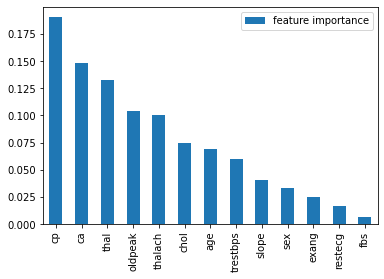

In [33]:
#rows without the last one
col= df.columns.tolist()[:-1]
df_feature_importance = pd.DataFrame(reg.feature_importances_, index=col, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance.plot(kind='bar');

In [34]:
import joblib

In [35]:
joblib.dump(knn,'Heart Diseses')

['Heart Diseses']

In [36]:
knn=joblib.load('Heart Diseses')